In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
pima_df = pd.read_csv('../data/pima.csv', dtype = {'diabetes': 'int8'})
pima_df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1


In [4]:
feature_cols = ['num_preg', 'insulin', 'bmi', 'age']
X = pima_df[feature_cols]
y = pima_df.diabetes

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [6]:
metrics.accuracy_score(y_test, y_pred)

0.69270833333333337

# Confusion Matrix
> Table that describes the performance of a classification model  
> And maybe point out the mistakes the model is making

> True Positive [TP] - Lower Right - 15 Correctly predicted as having diabetes  
> True Negative [TN] - Upper Left - 118 Correctly predicted as not having diabetes

> False Positive [FP] - Upper Right - 12 Incorrectly predicted as has diabetes when there was no diabetes - **Type 1 Error**  
> False Negative [FN] - Lower Left - 47 Incorrectly predicted as no diabetes when there was diabetes - **Type 2 Error**

In [7]:
metrics.confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 47,  15]], dtype=int64)

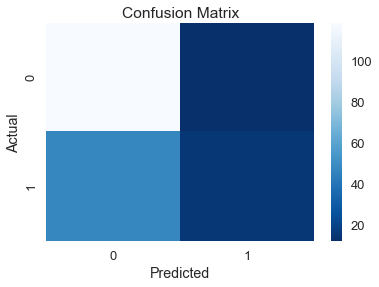

In [8]:
sns.set_context('talk')
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap = 'Blues_r')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Metrics computed from a Confusion Matrix

> Since we can't tell a model to choose from the best confusion matrix  
> We compute some metrics which then can be used to select the best model

### Classification Error
> How often the classifier is incorrect?

> Lower the better

In [9]:
1 - metrics.accuracy_score(y_test, y_pred)

0.30729166666666663

### Sensitivity
> How often is the classifier able to detect positive instance?

> True Positive or Recall

> Higher the better

In [10]:
metrics.recall_score(y_test, y_pred)

0.24193548387096775

### Precision
> When a positive value is predicted, how often is the prediction correct?

In [11]:
metrics.precision_score(y_test, y_pred)

0.55555555555555558